In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.getcwd()

'/Users/ar/Documents/FAnalytics/projects/notebooks'

In [122]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/Users/ar/Documents/FAnalytics/projects/data/soccer-spi/spi_matches_latest.csv")

In [123]:
df["league"].unique()

array(['Chinese Super League', 'Japanese J League', 'NWSL Challenge Cup',
       'Swedish Allsvenskan', 'Norwegian Tippeligaen',
       'Brasileiro Série A', 'Mexican Primera Division Torneo Apertura',
       'Russian Premier Liga', 'Danish SAS-Ligaen',
       'German 2. Bundesliga', 'Swiss Raiffeisen Super League',
       'Austrian T-Mobile Bundesliga', 'Belgian Jupiler League',
       'English League Championship', 'Scottish Premiership',
       'French Ligue 2', 'English League Two', 'English League One',
       'South African ABSA Premier League', 'Dutch Eredivisie',
       'Turkish Turkcell Super Lig', 'German Bundesliga',
       'French Ligue 1', 'Barclays Premier League', 'Portuguese Liga',
       'Italy Serie B', 'Spanish Primera Division',
       'Spanish Segunda Division', 'Italy Serie A', 'Greek Super League',
       'UEFA Champions League', 'UEFA Europa League',
       'UEFA Europa Conference League', "FA Women's Super League",
       'Australian A-League', 'Mexican Primera

In [124]:
def filter_league(df:pd.DataFrame, league:str, year:int):

    df = df[(df["league"] == league) & (df["season"] == year)]
    league_name = league

    df["date"] = pd.to_datetime(df["date"])
    df.reset_index(inplace = True)

    # Binary attributes
    df["home_win"] = [1 if x > y else 0 for x,y in zip(df["score1"], df["score2"])]
    df["tie"] = [1 if x == y else 0 for x,y in zip(df["score1"], df["score2"])]
    df["away_win"] = [1 if x < y else 0 for x,y in zip(df["score1"], df["score2"])]

    # Drop rows having nan values
    l1 = len(df)
    df = df.dropna(subset=["score1", "score2"])
    l2 = len(df)

    print(f"Number of rows dropped: {l1-l2}")
    return df, league_name

In [125]:
df, league_name = filter_league(df=df, league="Barclays Premier League", year=2022)
df
print(league_name)

Number of rows dropped: 149
Barclays Premier League


/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/588710470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/588710470.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["home_win"] = [1 if x > y else 0 for x,y in zip(df["score1"], df["score2"])]
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/588710470.py:11: SettingWithCopyWarning: 
A value is trying to be set on

In [126]:
def generate_rank_score(df):
    """Vectorized version of Ranked Probability Score.
    Lower value indicates a better score.
    """
    # Generate Brier Score
    df = df.assign(brier_score = lambda x:
                1/3*((x.prob1 - x.home_win)**2 +
                    (x.probtie - x.tie)**2 +
                    (x.prob2 - x.away_win)**2))

    # Get result and prediction
    result_df =  df[["home_win", "tie", "away_win"]]
    prediction_df = df[["prob1", "probtie", "prob2"]]

    prediction_df.rename(columns = {"prob1": "home_win", "probtie": "tie", "prob2": "away_win"}, inplace=True)

    # Checking condition
    assert (prediction_df.shape == result_df.shape), "prediction and observed array shapes must match"

    # Denominator = Total result categories - 1
    ncat = prediction_df.shape[1] - 1

    # Generate rank probability score
    df["rank_score"] = np.sum((np.cumsum(prediction_df, axis=1) - np.cumsum(result_df, axis=1)) ** 2, axis=1) / ncat

    return df


In [127]:
df = generate_rank_score(df=df)
df

/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/1112503508.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df.rename(columns = {"prob1": "home_win", "probtie": "tie", "prob2": "away_win"}, inplace=True)


,index,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,home_win,tie,away_win,brier_score,rank_score
0,1163,2022,2022-08-05,2411,Barclays Premier League,Crystal Palace,Arsenal,71.36,78.53,0.3159,0.4205,0.2636,1.16,1.39,22.8,48.6,0.0,2.0,1.30,1.36,1.40,2.41,0.00,1.72,0,0,1,0.168366,0.217807
1,1173,2022,2022-08-06,2411,Barclays Premier League,Fulham,Liverpool,58.70,90.51,0.0926,0.7466,0.1607,0.71,2.38,39.7,68.2,2.0,2.0,1.25,2.57,0.78,1.41,2.10,2.10,0,1,0,0.423470,0.283068
2,1186,2022,2022-08-06,2411,Barclays Premier League,AFC Bournemouth,Aston Villa,57.92,74.05,0.2719,0.4687,0.2594,1.06,1.48,40.2,28.8,2.0,0.0,0.49,0.68,0.79,1.95,1.84,0.00,1,0,0,0.272366,0.374905
3,1190,2022,2022-08-06,2411,Barclays Premier League,Newcastle,Nottingham Forest,68.65,57.31,0.5401,0.2045,0.2554,1.54,0.84,30.4,42.6,2.0,0.0,1.82,0.26,3.33,0.48,1.90,0.00,1,0,0,0.106186,0.126664
4,1202,2022,2022-08-06,2411,Barclays Premier League,Leeds United,Wolverhampton,62.15,67.72,0.3941,0.3456,0.2604,1.37,1.26,33.5,23.5,2.0,1.0,0.84,1.11,1.02,2.58,2.10,1.05,1,0,0,0.184787,0.243243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,7082,2022,2023-02-18,2411,Barclays Premier League,Brentford,Crystal Palace,74.11,65.68,0.5486,0.2105,0.2408,1.68,0.94,17.1,14.8,1.0,1.0,0.67,1.04,2.02,0.92,1.05,1.05,0,1,0,0.307219,0.172657
232,7085,2022,2023-02-18,2411,Barclays Premier League,Nottingham Forest,Manchester City,57.98,90.67,0.0787,0.7704,0.1509,0.64,2.43,43.1,88.2,1.0,1.0,0.86,3.25,0.32,3.01,1.05,1.05,0,1,0,0.440227,0.299855
233,7107,2022,2023-02-18,2411,Barclays Premier League,Newcastle,Liverpool,80.43,82.25,0.4129,0.3462,0.2409,1.58,1.42,92.7,73.5,0.0,2.0,1.98,2.07,1.45,1.48,0.00,2.10,0,0,1,0.218658,0.298970
234,7166,2022,2023-02-19,2411,Barclays Premier League,Manchester United,Leicester City,80.46,70.09,0.6139,0.1805,0.2056,2.06,1.02,59.9,13.0,3.0,0.0,3.89,1.56,2.60,1.33,3.15,0.00,1,0,0,0.074642,0.090827


In [128]:
df[["team1", "team2", "score1", "score2", "prob1", "probtie", "prob2", "home_win", "tie", "away_win", "brier_score", "rank_score"]]

,team1,team2,score1,score2,prob1,probtie,prob2,home_win,tie,away_win,brier_score,rank_score
0,Crystal Palace,Arsenal,0.0,2.0,0.3159,0.2636,0.4205,0,0,1,0.168366,0.217807
1,Fulham,Liverpool,2.0,2.0,0.0926,0.1607,0.7466,0,1,0,0.423470,0.283068
2,AFC Bournemouth,Aston Villa,2.0,0.0,0.2719,0.2594,0.4687,1,0,0,0.272366,0.374905
3,Newcastle,Nottingham Forest,2.0,0.0,0.5401,0.2554,0.2045,1,0,0,0.106186,0.126664
4,Leeds United,Wolverhampton,2.0,1.0,0.3941,0.2604,0.3456,1,0,0,0.184787,0.243243
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Brentford,Crystal Palace,1.0,1.0,0.5486,0.2408,0.2105,0,1,0,0.307219,0.172657
232,Nottingham Forest,Manchester City,1.0,1.0,0.0787,0.1509,0.7704,0,1,0,0.440227,0.299855
233,Newcastle,Liverpool,0.0,2.0,0.4129,0.2409,0.3462,0,0,1,0.218658,0.298970
234,Manchester United,Leicester City,3.0,0.0,0.6139,0.2056,0.1805,1,0,0,0.074642,0.090827


In [129]:
viz_df = pd.DataFrame()
teams = df["team1"].unique()

for team in teams:
    team_df = df[(df["team1"] == team) | (df["team2"] == team)].copy()

    # Calculate rolling avg (rps)
    mean_rps = team_df["rank_score"].expanding().mean()

    df1 = pd.DataFrame()
    df1["mean_rps"] = mean_rps
    df1["team"] = team

    viz_df = viz_df.append(df1)


/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/2525110358.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  viz_df = viz_df.append(df1)
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/2525110358.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  viz_df = viz_df.append(df1)
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/2525110358.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  viz_df = viz_df.append(df1)
/var/folders/h7/zl8j3kvn5vl_xpmf_mnnfxm80000gn/T/ipykernel_32731/2525110358.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  viz_df = viz_df.append(df1)
/var/folders/h7/

In [130]:
viz_df

,mean_rps,team
0,0.217807,Crystal Palace
19,0.246430,Crystal Palace
21,0.247400,Crystal Palace
34,0.192854,Crystal Palace
40,0.184232,Crystal Palace
...,...,...
184,0.273240,Liverpool
194,0.268339,Liverpool
209,0.280679,Liverpool
224,0.269627,Liverpool


In [131]:
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
#from highlight_text import ax_text, fig_text

In [132]:
for team in viz_df["team"].unique():
    print(team)

Crystal Palace
Fulham
AFC Bournemouth
Newcastle
Leeds United
Tottenham Hotspur
Everton
Leicester City
Manchester United
West Ham United
Aston Villa
Wolverhampton
Manchester City
Brighton and Hove Albion
Arsenal
Southampton
Brentford
Nottingham Forest
Chelsea
Liverpool


In [133]:
  order_teams = (viz_df.groupby(["team"])["mean_rps"]
    .last()
    .reset_index()
    .sort_values(by = "mean_rps"))

In [134]:
order_teams

,team,mean_rps
12,Manchester City,0.164608
0,AFC Bournemouth,0.172252
14,Newcastle,0.180063
17,Tottenham Hotspur,0.185537
1,Arsenal,0.188120
19,Wolverhampton,0.189770
18,West Ham United,0.194010
13,Manchester United,0.197687
6,Crystal Palace,0.199051
9,Leeds United,0.213947


In [135]:
team_counter = 0
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):

        plot_team_df = order_teams.iloc[team_counter]
        team_name = plot_team_df["team"]
        print(f"Row: {row}, Col: {col}, Team: {team_name}")

        team_counter += 1

Row: 0, Col: 0, Team: Manchester City
Row: 0, Col: 1, Team: AFC Bournemouth
Row: 0, Col: 2, Team: Newcastle
Row: 0, Col: 3, Team: Tottenham Hotspur
Row: 1, Col: 0, Team: Arsenal
Row: 1, Col: 1, Team: Wolverhampton
Row: 1, Col: 2, Team: West Ham United
Row: 1, Col: 3, Team: Manchester United
Row: 2, Col: 0, Team: Crystal Palace
Row: 2, Col: 1, Team: Leeds United
Row: 2, Col: 2, Team: Leicester City
Row: 2, Col: 3, Team: Chelsea
Row: 3, Col: 0, Team: Nottingham Forest
Row: 3, Col: 1, Team: Everton
Row: 3, Col: 2, Team: Fulham
Row: 3, Col: 3, Team: Aston Villa
Row: 4, Col: 0, Team: Brentford
Row: 4, Col: 1, Team: Southampton
Row: 4, Col: 2, Team: Brighton and Hove Albion
Row: 4, Col: 3, Team: Liverpool


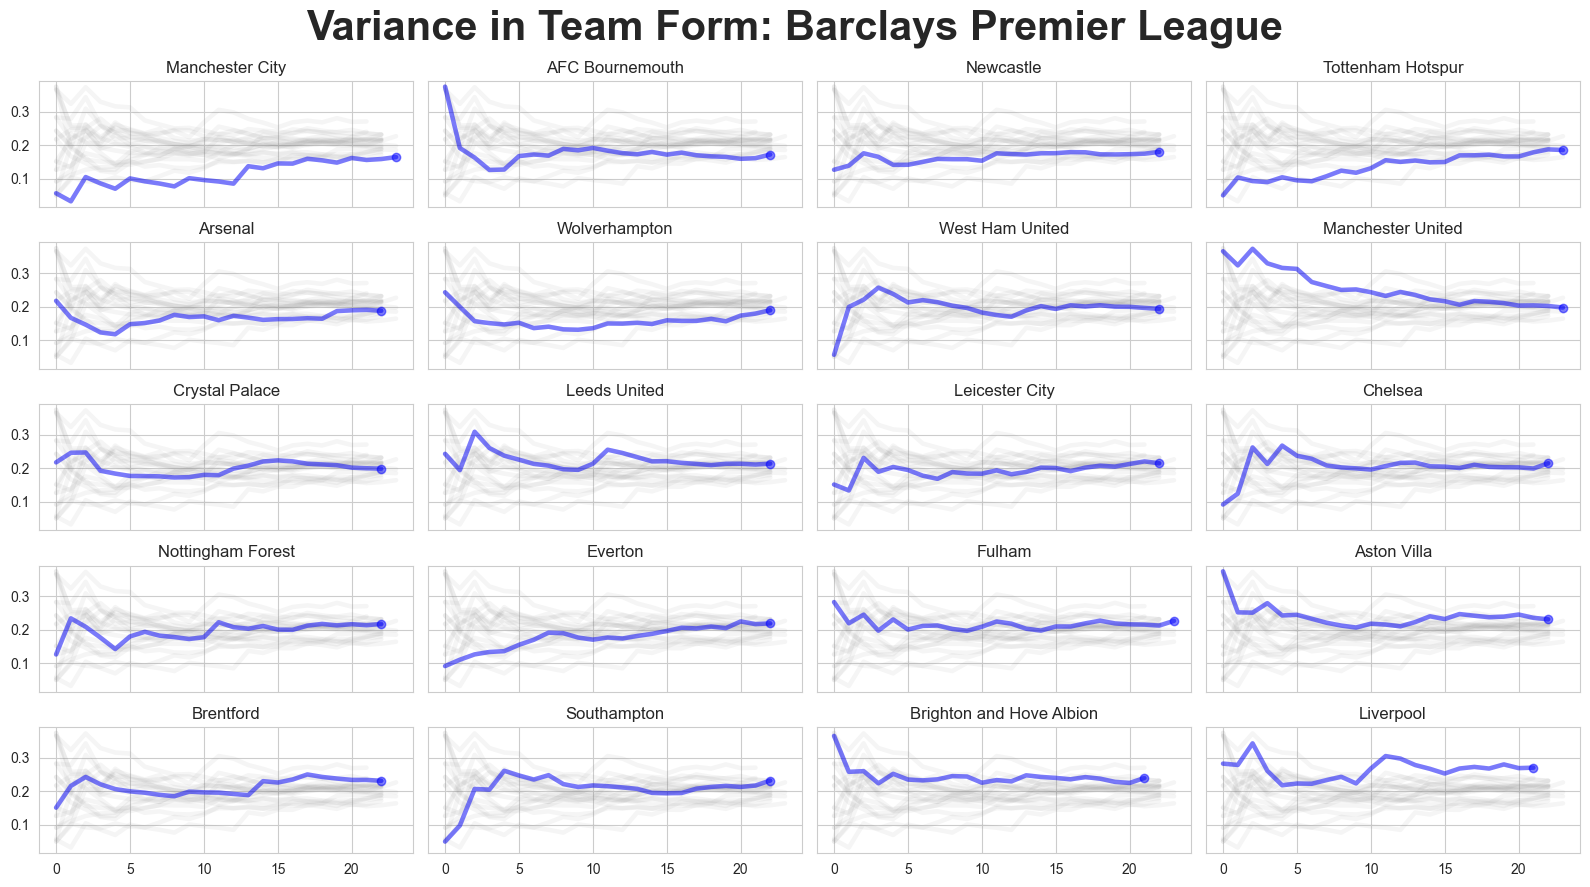

In [136]:
fig, axs = plt.subplots(5, 4, figsize = (16,9) ,sharex=True, sharey=True)

team_counter = 0
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):

        for team in viz_df["team"].unique():
            team_df = viz_df[viz_df["team"] == team].reset_index(drop = True)
            axs[row,col].plot(team_df.index, team_df["mean_rps"], color = "gray", alpha = 0.08,
            lw = 3.25, zorder = 2)

        plot_team_df = order_teams.iloc[team_counter]
        team_name = plot_team_df["team"]

        df_new = viz_df[viz_df["team"] == team_name].reset_index(drop = True)

        axs[row,col].plot(df_new.index, df_new["mean_rps"], color = "blue", alpha = 0.5,
            lw = 3.25, zorder = 2, marker = "o", markevery = [-1], )

        axs[row,col].set_title(team_name)

        team_counter += 1

fig.suptitle(f"Variance in Team Form: {league_name}", size = 30, fontweight = "bold")
fig.tight_layout()


In [217]:
def plot_team_score(ax, team_id, data, label_y = True, label_x = True):

    df = data.copy()

    team_df = df[df["team"] == team_id].reset_index(drop = True)
    #color = team_df["color"].iloc[0]

    ax.plot(team_df.index, team_df["mean_rps"],
        #color = color,
        lw = 1.75,
        zorder = 3,
        marker = "o",
        markevery = [-1],
        markeredgecolor = "#EFE9E6"
    )

    ax.annotate(
        xy = (team_df.index[-1], team_df["mean_rps"].iloc[-1]),
        xytext = (15, 0),
        text = f'{team_df["mean_rps"].iloc[-1]:.3f}',
        textcoords = "offset points",
        ha = "center",
        va = "center",
        #color = color,
        weight = "bold",
        size = 8
    )

    for x in df["team"].unique():
        if x == team_id:
            continue
        aux_df = df[df["team"] == x].reset_index(drop = True)

        ax.plot(
            aux_df.index,
            aux_df["mean_rps"],
            color = "gray",
            alpha = 0.15,
            lw = 1.25,
            zorder = 2
        )

    ax.grid(ls = ":", color = "lightgrey")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

    if label_y:
        ax.set_ylabel("RPS")
    else:
        ax.set_yticklabels([])
    if label_x:
        ax.set_xlabel("Match day")
    else:
        ax.set_xticklabels([])

    return ax


order_teams = (
    viz_df.groupby(["team"])
    ["mean_rps"]
    .last()
    .reset_index()
    .sort_values(by = "mean_rps")
)

fig = plt.figure(figsize=(40, 190), dpi = 200)
nrows = 10
ncols = 4
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig,
    height_ratios = [(1/nrows)*5. if x % 2 != 0 else (1/nrows)/2. for x in range(nrows)], hspace = 0.2
)


<Figure size 8000x38000 with 0 Axes>

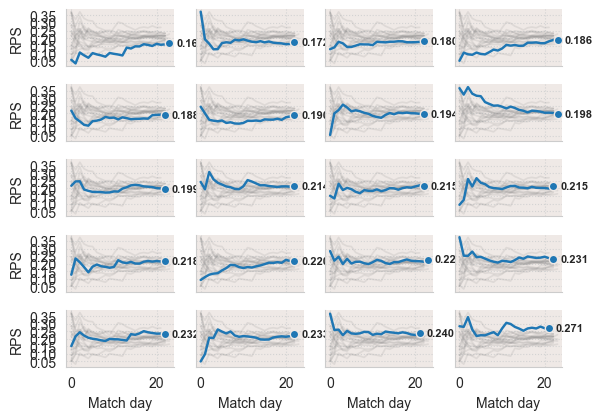

In [218]:
plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )

            teamId = order_teams["team"].iloc[plot_counter]

            if col == 0:
                labels_y = True
            else:
                labels_y = False

            if row == nrows - 1:
                labels_x = True
            else:
                labels_x = False

            plot_team_score(ax, teamId, viz_df, labels_y, labels_x)

            plot_counter += 1

In [233]:
df_test = viz_df[viz_df["team"] == "Brighton and Hove Albion"].reset_index(drop=True)
df_test

,mean_rps,team
0,0.365888,Brighton and Hove Albion
1,0.258539,Brighton and Hove Albion
2,0.260622,Brighton and Hove Albion
3,0.224248,Brighton and Hove Albion
4,0.252564,Brighton and Hove Albion
5,0.235458,Brighton and Hove Albion
6,0.233033,Brighton and Hove Albion
7,0.236125,Brighton and Hove Albion
8,0.245838,Brighton and Hove Albion
9,0.244509,Brighton and Hove Albion


Text(20, 0, '0.240')

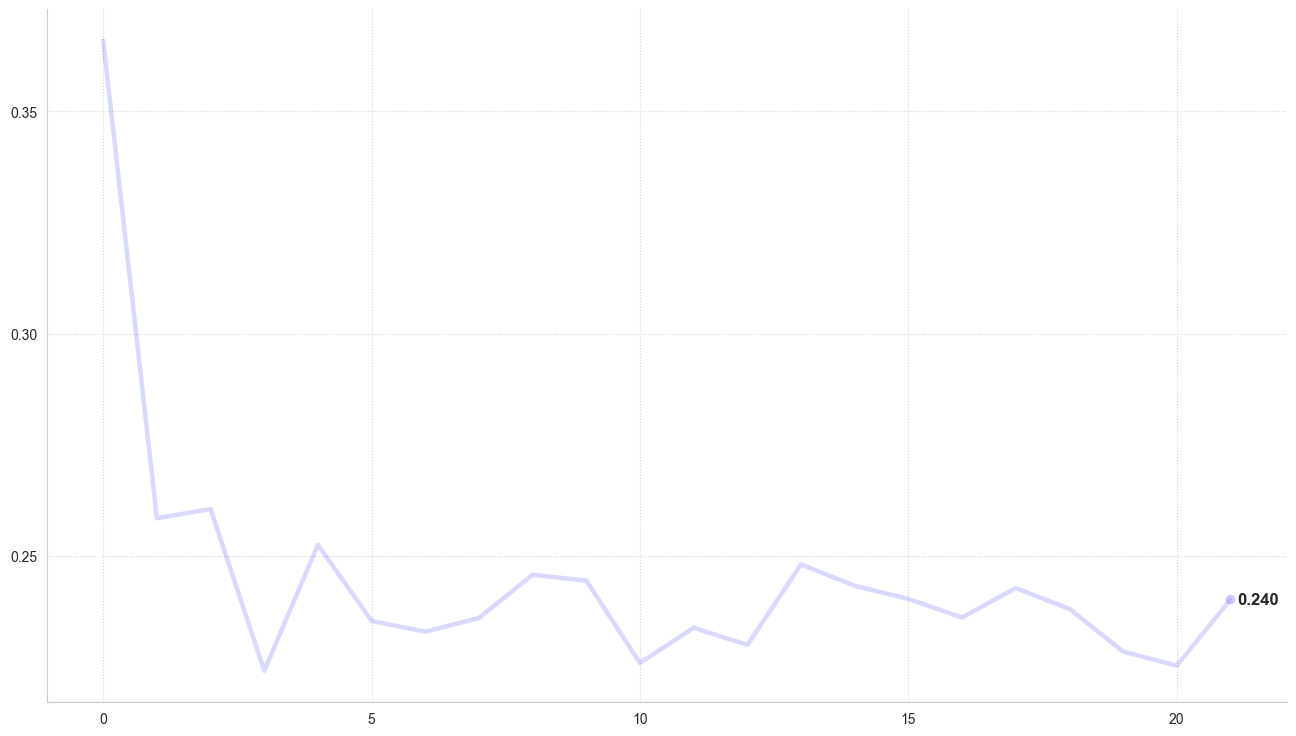

In [204]:
fig,ax = plt.subplots(figsize=(16,9))
#fig.set_facecolor("gray")

ax.plot(df_test.index, df_test["mean_rps"], color = "blue", alpha = 0.15,
        lw = 3.25, zorder = 2, marker = "o", markevery = [-1])

ax.grid(ls = ":", color = "lightgrey")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Sets range of y_ticks starting from value
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

ax.annotate(
    xy = (df_test.index[-1], df_test["mean_rps"].iloc[-1]),
    xytext = (20, 0),
    text = f'{df_test["mean_rps"].iloc[-1]:.3f}',
    textcoords = "offset points",
    ha = "center",
    va = "center",
    #color = color,
    weight = "bold",
    size = 12
)